In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
import pandas as pd
import datetime
import pickle
import scipy
import numpy as np

In [3]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from num2words import num2words
from nltk.corpus import stopwords
import nltk

In [4]:
INPUT_FOLDER = '4_all_data_preprocessed'

INPUT_FILE_MERGED = 'merged_dataset_v2.csv'
INPUT_FILE_ISW = 'all_isw.csv'

INPUT_MODELS ='training_models'
MODEL_FOLDER = "models"

tfidf_transformer_model = "tfidf_transformer"
count_vectorizer_model = "count_vectorizer"

tfidf_transformer_version = "v1"
count_vectorizer_version = "v1"

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
df_raw_data = pd.read_csv(f'{INPUT_FOLDER}/{INPUT_FILE_MERGED}',sep = ';')

In [7]:
df_raw_data.head()

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_last_24_hour_in_region,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,report_date,date_tomorrow_datetime,keywords,main_html,report_text_lemm
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...


In [8]:
is_alarm = ~((df_raw_data['event_end_hour'].isna()) & (df_raw_data['event_start_hour'].isna()))

In [9]:
df_raw_data['is_alarm']= is_alarm
df_raw_data

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,report_date,date_tomorrow_datetime,keywords,main_html,report_text_lemm,is_alarm
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194528,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194529,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194530,"Луцьк, Луцький район, Україна",2023-01-20,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False


In [10]:
df_all = df_raw_data

In [11]:
df_all.head()

,city_resolvedAddress,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,report_date,date_tomorrow_datetime,keywords,main_html,report_text_lemm,is_alarm
0,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
1,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
2,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
3,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
4,"Херсон, Україна",2022-02-25,6.4,0.7,3.7,0.2,78.0,0.0,0.0,99.5,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False


In [12]:
to_delete = ['city_resolvedAddress',
'day_datetime',
"hour_datetime",
"hour_datetimeEpoch",
"city",
"region",
"center_city_ua",
"center_city_en",
"event_region_title",
"event_region_city",
"event_all_region",
"event_clean_end",
"event_intersection_alarm_id",
"event_start_hour",
"event_end_hour",
"event_start_hour_datetimeEpoch",
"event_end_hour_datetimeEpoch",
"event_hour_level_event_time",
"event_hour_level_event_datetimeEpoch"
]

In [13]:
df_weather_matrix = df_all.drop(to_delete, axis = 1)
df_weather_matrix

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,...,event_end_date,event_intersection_alarm_region_counts,event_amount_of_alarms_for_one_day,event_last_24_hour_in_region,report_date,date_tomorrow_datetime,keywords,main_html,report_text_lemm,is_alarm
0,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
1,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
2,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
3,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
4,6.4,0.7,3.7,0.2,78.0,0.000,0.00,99.5,8.7,3.0,...,NaN,NaN,NaN,NaN,2022-02-25,2022-02-26,"{'pm': 0.36, 'zero': 0.351, 'februari': 0.336,...","<div class=""field field-name-body field-type-t...",russian forc enter outskirt kyiv west bank dn...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194527,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194528,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194529,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False
194530,3.7,0.3,1.5,0.4,92.5,0.704,4.17,19.6,1.6,1.0,...,NaN,NaN,NaN,NaN,2023-01-20,2023-01-21,"{'januari': 0.453, 'wagner': 0.231, 'pavlov': ...","<div class=""field field-name-body field-type-t...",head chechen republ ramzan kadyrov continu fr...,False


In [14]:
additional_to_delete = [
"day_sunset",
"hour_preciptype",
"hour_conditions",
"region_alt",
"event_start",
"event_end",
"hour_solarenergy",
'event_region_id',
'event_duration',
'event_duration_in_mins_int',
'event_amount_of_alarms_for_one_day',
'event_intersection_alarm_region_counts',
'event_last_24_hour_in_region',
'event_start_date',
'event_end_date',
'day_sunrise',
    "report_date",
'date_tomorrow_datetime',
'main_html',
'keywords',
'report_text_lemm'
]

In [15]:
df_weather_matrix_v1 = df_weather_matrix.drop(additional_to_delete, axis = 1)


In [16]:
df_weather_matrix_v2 = df_weather_matrix_v1.drop(['is_alarm'],axis=1 ).fillna(method="ffill")

In [17]:
df_weather_matrix_v2.sample(5)

,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,day_uvindex,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,hour_severerisk,region_id
78174,8.0,-0.1,3.0,-3.3,63.5,0.0,0.00,121.7,10.6,4.0,...,36.7,21.6,110.0,1027.9,10.1,40.2,344.0,3.0,10.0,17
114186,22.9,9.4,17.5,6.9,50.3,0.0,0.00,319.8,27.5,9.0,...,6.8,2.5,124.9,1020.7,24.1,28.1,0.0,0.0,10.0,14
103728,5.2,-4.9,-0.1,-5.9,67.0,0.0,0.00,184.2,16.0,5.0,...,11.9,5.4,295.1,1035.0,24.1,0.0,214.0,0.0,10.0,6
149159,21.4,12.6,16.5,12.4,77.4,16.6,8.33,58.8,5.3,5.0,...,55.4,25.6,265.3,1013.0,13.3,100.0,0.0,0.0,10.0,13
97016,24.6,13.1,18.3,7.1,48.3,0.1,4.17,230.8,19.9,8.0,...,9.5,4.7,189.4,1018.7,24.1,95.6,0.0,0.0,10.0,22


In [18]:
df_weather_matrix_v2.dtypes

day_tempmax            float64
day_tempmin            float64
day_temp               float64
day_dew                float64
day_humidity           float64
day_precip             float64
day_precipcover        float64
day_solarradiation     float64
day_solarenergy        float64
day_uvindex            float64
hour_temp              float64
hour_humidity          float64
hour_dew               float64
hour_precip            float64
hour_precipprob        float64
hour_snow              float64
hour_snowdepth         float64
hour_windgust          float64
hour_windspeed         float64
hour_winddir           float64
hour_pressure          float64
hour_visibility        float64
hour_cloudcover        float64
hour_solarradiation    float64
hour_uvindex           float64
hour_severerisk        float64
region_id                int64
dtype: object

In [19]:
df_weather_matrix_v2_csr = scipy.sparse.csr_matrix(df_weather_matrix_v2.values)


# TD-IDF

In [20]:
tf_idf = pickle.load(open(f"{MODEL_FOLDER}/{tfidf_transformer_model}_{tfidf_transformer_version}.pkl", "rb"))
cv = pickle.load(open(f"{MODEL_FOLDER}/{count_vectorizer_model}_{count_vectorizer_version}.pkl", "rb"))

In [21]:
type(tf_idf)

sklearn.feature_extraction.text.TfidfTransformer

In [22]:
cv_vector = cv.transform(df_all['report_text_lemm'].values.astype('U'))


In [23]:
tf_idf_vector = tf_idf.transform(cv_vector)

In [24]:
tf_idf_vector.shape

(194532, 6504)

In [25]:
df_all_data_csr = scipy.sparse.hstack((df_weather_matrix_v2_csr, tf_idf_vector), format='csr')

In [26]:
df_all_data_csr

<194532x6531 sparse matrix of type '<class 'numpy.float64'>'
	with 116635964 stored elements in Compressed Sparse Row format>

In [34]:
from scipy.sparse import csr_matrix, save_npz

In [35]:
save_npz("4_all_data_preprocessed/matrix.npz", df_all_data_csr)

# Train

In [18]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_decomposition import PLSCanonical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import shuffle

In [5]:
from scipy.sparse import load_npz

# Загрузка матрицы из файла .npz
matrix_loaded = load_npz("4_all_data_preprocessed/matrix.npz")

In [14]:
RANDOM_STATE = 1
X_train, X_test, y_train, y_test = train_test_split(matrix_loaded, is_alarm,
test_size=0.20,
random_state = RANDOM_STATE,
shuffle=True)

# 1

In [17]:
model_1 = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [18]:
model_1.fit(X_train, y_train)

C:\Users\Daryna Semenets\python_arbeiten\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [19]:
predicted = model_1.predict(X_test)
np.mean(predicted == y_test)

0.7453414552651194

In [32]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
circle = 0

for train_index, test_index in tscv.split(matrix_loaded):
   
    X_train, X_test = matrix_loaded[train_index], matrix_loaded[test_index]
    y_train, y_test = is_alarm[train_index], is_alarm[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    
    model_1 = SGDClassifier()
    
    model_1.fit(X_train, y_train)
    model_1_predict = model_1.predict(X_test)
    model_1_accuracy = accuracy_score(y_test, model_1_predict)
    model_1_report = classification_report(y_test, model_1_predict)
    
    print("SGDC Accuracy:", model_1_accuracy)
    print("SGDC Report:", model_1_report)
    
    circle = circle +1
    
    


(32422, 6531)
(32422, 6531)
SGDC Accuracy: 0.5783727098883474
SGDC Report:               precision    recall  f1-score   support

       False       0.69      0.59      0.64     20424
        True       0.44      0.55      0.49     11998

    accuracy                           0.58     32422
   macro avg       0.57      0.57      0.57     32422
weighted avg       0.60      0.58      0.58     32422

(64844, 6531)
(32422, 6531)
SGDC Accuracy: 0.7083770279439886
SGDC Report:               precision    recall  f1-score   support

       False       0.74      0.90      0.81     23029
        True       0.49      0.25      0.33      9393

    accuracy                           0.71     32422
   macro avg       0.62      0.57      0.57     32422
weighted avg       0.67      0.71      0.67     32422

(97266, 6531)
(32422, 6531)


C:\Users\Daryna Semenets\python_arbeiten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daryna Semenets\python_arbeiten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Daryna Semenets\python_arbeiten\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

SGDC Accuracy: 0.7469002529146875
SGDC Report:               precision    recall  f1-score   support

       False       0.75      1.00      0.86     24216
        True       0.00      0.00      0.00      8206

    accuracy                           0.75     32422
   macro avg       0.37      0.50      0.43     32422
weighted avg       0.56      0.75      0.64     32422

(129688, 6531)
(32422, 6531)
SGDC Accuracy: 0.45734377891555117
SGDC Report:               precision    recall  f1-score   support

       False       0.80      0.39      0.52     24926
        True       0.25      0.69      0.37      7496

    accuracy                           0.46     32422
   macro avg       0.53      0.54      0.45     32422
weighted avg       0.68      0.46      0.49     32422

(162110, 6531)
(32422, 6531)
SGDC Accuracy: 0.8528776756523349
SGDC Report:               precision    recall  f1-score   support

       False       0.85      1.00      0.92     27671
        True       0.34      0.00    

# RandomForest

In [15]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 7
tscv = TimeSeriesSplit(n_splits=n_splits)
circle = 0

for train_index, test_index in tscv.split(matrix_loaded):
   
    X_train, X_test = matrix_loaded[train_index], matrix_loaded[test_index]
    y_train, y_test = is_alarm[train_index], is_alarm[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    
    model_2 = RandomForestClassifier()
    
    model_2.fit(X_train, y_train)
    model_2_predict = model_2.predict(X_test)
    model_2_accuracy = accuracy_score(y_test, model_2_predict)
    model_2_report = classification_report(y_test, model_2_predict)
    
    print("Forest Accuracy:", model_2_accuracy)
    print("Forest Report:", model_2_report)
    
    
    name = 'random_forest'
    version = '1.' + str(circle)
    name_model = f'{name}__{version}.pkl'
    
    with open(f'{INPUT_MODELS}/{name_model}.pkl','wb') as handle:
        pickle.dump(model_2, handle)
    
    circle = circle +1


(24320, 6531)
(24316, 6531)
Forest Accuracy: 0.701184405329824
Forest Report:               precision    recall  f1-score   support

       False       0.70      0.96      0.81     16410
        True       0.68      0.15      0.25      7906

    accuracy                           0.70     24316
   macro avg       0.69      0.56      0.53     24316
weighted avg       0.69      0.70      0.63     24316

(48636, 6531)
(24316, 6531)
Forest Accuracy: 0.702171409771344
Forest Report:               precision    recall  f1-score   support

       False       0.69      0.96      0.80     15534
        True       0.77      0.25      0.38      8782

    accuracy                           0.70     24316
   macro avg       0.73      0.60      0.59     24316
weighted avg       0.72      0.70      0.65     24316

(72952, 6531)
(24316, 6531)
Forest Accuracy: 0.7479848659318967
Forest Report:               precision    recall  f1-score   support

       False       0.75      0.96      0.84     17237
  

In [9]:
name = 'random_forest'
version = 'v1'
name_model = f'6__{name}__{version}'
model_4 = pickle.load(open (f"{'models'}/{name_model}.pkl", "rb"))

In [16]:
names_of_columns = np.array(['day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity',
       'day_precip', 'day_precipcover', 'day_solarradiation',
       'day_solarenergy', 'day_uvindex', 'day_moonphase', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_windgust', 'hour_windspeed',
       'hour_winddir', 'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_uvindex', 'hour_severerisk', 'region_id'])
import matplotlib.pyplot as plt

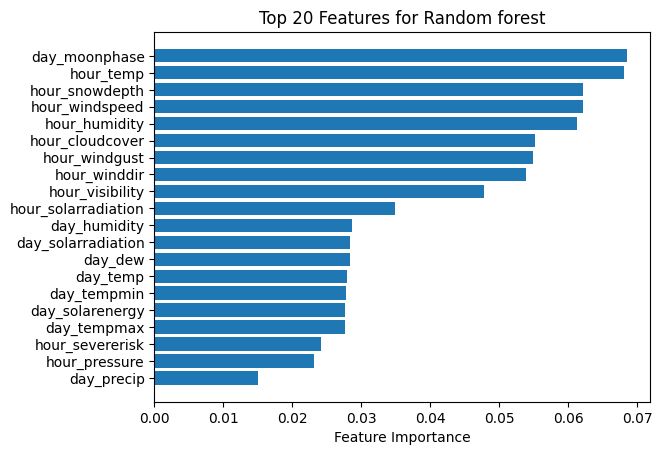

In [17]:
importances = model_4.feature_importances_

indices = np.argsort(importances)[::-1]

top_features = names_of_columns[indices[:20]]
top_weights = importances[indices][:20]

fig, ax = plt.subplots()
ax.barh(top_features, top_weights)

ax.set_title("Top 20 Features for Random forest")
ax.set_xlabel("Feature Importance")

ax.invert_yaxis()

plt.show()

# DecisionTree

In [33]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 7
tscv = TimeSeriesSplit(n_splits=n_splits)
circle = 0

for train_index, test_index in tscv.split(matrix_loaded):
   
    X_train, X_test = matrix_loaded[train_index], matrix_loaded[test_index]
    y_train, y_test = is_alarm[train_index], is_alarm[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    
    model_3 = tree.DecisionTreeClassifier()
    
    model_3.fit(X_train, y_train)
    model_3_predict = model_3.predict(X_test)
    model_3_accuracy = accuracy_score(y_test, model_3_predict)
    model_3_report = classification_report(y_test, model_3_predict)
    
    print("Decisiion_tree Accuracy:", model_3_accuracy)
    print("Decisiion_tree Report:", model_3_report)
    
    
    name = 'decisiion_tree'
    version = '1.' + str(circle)
    name_model = f'{name}__{version}.pkl'
    
    with open(f'{INPUT_MODELS}/{name_model}.pkl','wb') as handle:
        pickle.dump(model_3, handle)
    
    circle = circle +1


# LogisticRegression

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 7
tscv = TimeSeriesSplit(n_splits=n_splits)
circle = 0

for train_index, test_index in tscv.split(matrix_loaded):
    
    X_train, X_test = matrix_loaded[train_index], matrix_loaded[test_index]
    y_train, y_test = is_alarm[train_index], is_alarm[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    
    model_4 =  LogisticRegression(penalty="l1", tol=0.01, solver="saga")
    
    model_4.fit(X_train, y_train)
    model_4_predict = model_4.predict(X_test)
    model_4_accuracy = accuracy_score(y_test, model_4_predict)
    model_4_report = classification_report(y_test, model_4_predict)
    
    print("Logis_reg Accuracy:", model_4_accuracy)
    print("Logis_reg Report:", model_4_report)
    
    
    name = 'logis_reg'
    version = '1.' + str(circle)
    name_model = f'{name}__{version}.pkl'
    
    with open(f'{INPUT_MODELS}/{name_model}.pkl','wb') as handle:
        pickle.dump(model_4, handle)
    
    circle = circle +1
